In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [3]:
# Standard example 
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer, plot_train 
from peratouch.networks import CNN
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.shuffle()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99884153]
[1.00068139]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Shape of test set: (4664, 1, 32) 
Shape of train set: (22462, 1, 32) 
Shape of validation set: (3964, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.24, 0.19, 0.19, 0.18, 0.2] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.18] 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.258, loss_val=1.258, train=45.0%, val=45.2%
End of epoch 3:loss_tr=1.048, loss_val=1.028, train=56.6%, val=57.7%
End of epoch 5:loss_tr=0.942, loss_val=0.924, train=61.8%, val=63.0%
End of epoch 7:loss_tr=0.880, loss_val=0.856, train=64.4%, val=65.4%
End of epoch 9:loss_tr=0.830, loss_val=0.810, train=66.4%, val=67.0%
End of epoch 11:loss_tr=0.777, loss_val=0.759, train=68.7%, val=69.5%
End of epoch 13:loss_tr=0.755, loss_val=0.742, train=70.4%, val=70.8%
End of epoch 15:loss_tr=0.712, loss_val=0.701, train=72.0%, val=72.4%
End of epoch 17:loss_tr=0.698, loss_val=0.693, train=72.5%, val=72.4%
End of epoch 19:loss_tr=0.679, loss_val=0.667, train=73.3%, val=73.6%
End of epoch 21:loss_tr=0.655, loss_val=0.649, train=74.5%, val=74.5%
End of epoch 23:loss_tr=0.647, loss_val=0.644, train=74.2%, val=74.2%
End of epoch 25:loss_tr=0.655, loss_val=0.651, train=74.0%, val=74.2%
End of epoch 27:loss_tr=0.665, loss_val=0.669, train=73.5%, val=74.0%
End of epoch 29:loss_tr=0

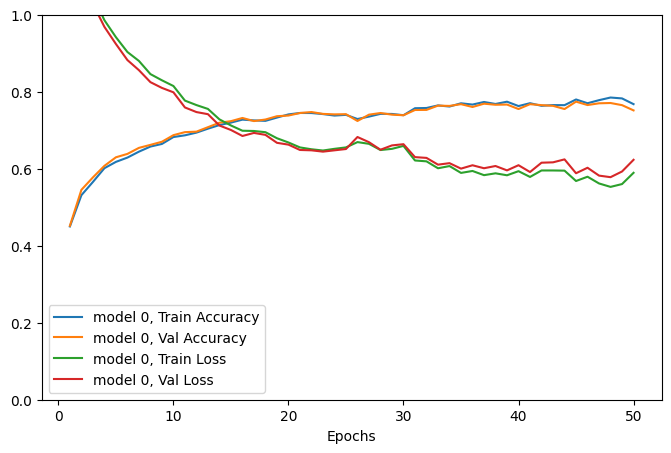

In [4]:
models = [CNN(input_ch=1, n_filters=8, n_hidden=128, out_size=5)]
trainers = [Trainer(D)]
for model, T in zip(models, trainers):
    T.setup(model, max_epochs=50, batch_size=5000)
    T.train_model(model)
plot_train(trainers)
test_accuracy([D, D], models)

In [1]:
# Look at 3 channels
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer , plot_train
from peratouch.networks import CNN 
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1. 1. 1.]
[1.00057317 0.99995641 0.99929076]
[1.00192988 1.00256451 1.00235689]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31075, 3, 32) 
Labels shape:  (31075,) 
Shape of test set: (4661, 3, 32) 
Shape of train set: (21752, 3, 32) 
Shape of validation set: (4662, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.25, 0.2, 0.2, 0.17, 0.18] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.19] 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=0.952, loss_val=0.974, train=61.2%, val=60.3%
End of epoch 3:loss_tr=0.693, loss_val=0.724, train=72.3%, val=71.1%
End of epoch 5:loss_tr=0.675, loss_val=0.729, train=73.4%, val=70.5%
End of epoch 7:loss_tr=0.521, loss_val=0.560, train=79.4%, val=77.3%
End of epoch 9:loss_tr=0.495, loss_val=0.544, train=80.3%, val=77.9%
End of epoch 11:loss_tr=0.486, loss_val=0.535, train=80.5%, val=78.2%
End of epoch 13:loss_tr=0.505, loss_val=0.574, train=79.7%, val=77.0%
End of epoch 15:loss_tr=0.451, loss_val=0.520, train=82.6%, val=79.7%
End of epoch 17:loss_tr=0.445, loss_val=0.512, train=82.6%, val=80.5%
End of epoch 19:loss_tr=0.386, loss_val=0.453, train=85.1%, val=81.6%
End of epoch 21:loss_tr=0.352, loss_val=0.429, train=86.8%, val=83.1%
End of epoch 23:loss_tr=0.392, loss_val=0.462, train=84.9%, val=82.7%
End of epoch 25:loss_tr=0.422, loss_val=0.513, train=83.4%, val=79.2%
End of epoch 27:loss_tr=0.345, loss_val=0.420, train=86.9%, val=83.0%
End of epoch 29:loss_tr=0

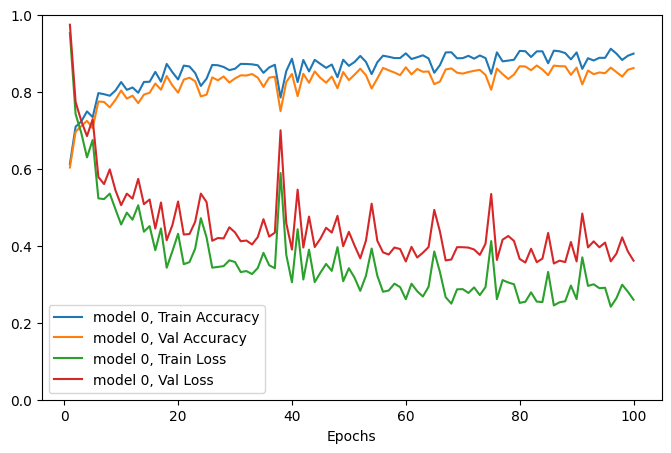

In [2]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3, n_filters=16, n_hidden=256, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=100, batch_size=700)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

In [1]:
# TODO: To look at some simple transforms, set transforms=True
# TODO: Look at longer windows of data, maybe width=64